# Feature Selection

🎯 This exercise is a continuation of the previous one, in which you will perform ***feature selection***. 

👇 Run the cell below to load the preprocessed dataset from the *previous challenge 1 - Preprocessing Workflow*.

In [1]:
import pandas as pd

# Run this cell if you 
data = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/05-Machine-Learning/02-Prepare-the-dataset/clean_dataset.csv")

data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,CentralAir,SalePrice,Fin,NoGarage,RFn,Unf,sin_MoSold,cos_MoSold
0,0.380070,0.375,0.333333,0.500,0.316729,1.0,208500,0.0,0.0,1.0,0.0,0.500000,0.866025
1,-0.312090,0.375,0.333333,0.875,0.069650,1.0,181500,0.0,0.0,1.0,0.0,0.866025,-0.500000
2,0.497489,0.375,0.333333,0.500,0.228124,1.0,223500,0.0,0.0,1.0,0.0,-0.866025,-0.500000
3,0.390885,0.375,0.333333,0.500,0.442583,1.0,140000,0.0,0.0,0.0,1.0,0.500000,0.866025
4,1.134029,0.500,0.333333,0.500,0.566894,1.0,250000,0.0,0.0,1.0,0.0,-0.500000,0.866025


## (1) Correlation investigation

❓ Plot a heatmap of the ***Pearson Correlation*** between the columns of the dataset ❓

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

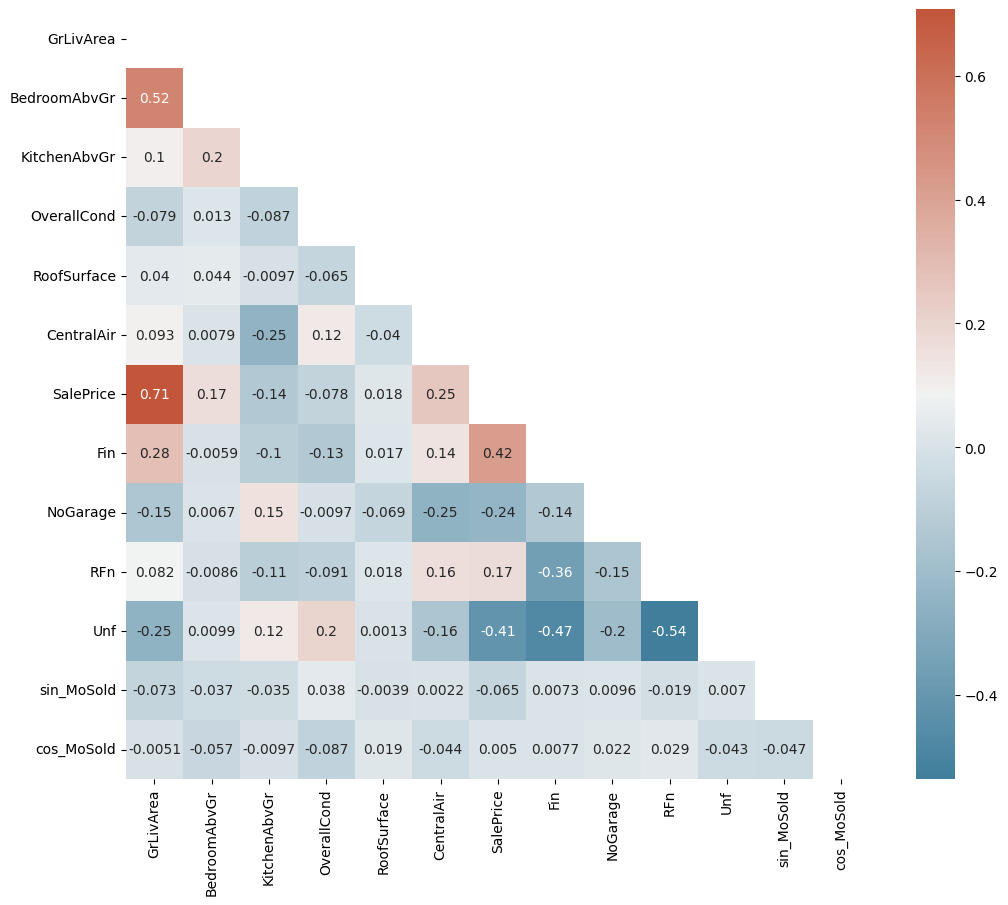

In [3]:
corr = data.corr()
#
# Set up the matplotlib plot configuration
#
f, ax = plt.subplots(figsize=(12, 10))
#
# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(corr, dtype=bool))
#
# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap
#
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

❓ Visualize the correlation between column pairs in a dataframe ❓

In [31]:
corr_df = corr.stack().reset_index()

#Renaming the columns
corr_df.columns = ['feature_1','feature_2','correlation']

#Remove 'self correlations'
no_self_correlation = (corr_df['feature_1'] != corr_df['feature_2'])

corr_df = corr_df[no_self_correlation]

corr_df

,feature_1,feature_2,correlation
1,GrLivArea,BedroomAbvGr,0.519712
2,GrLivArea,KitchenAbvGr,0.100093
3,GrLivArea,OverallCond,-0.078781
4,GrLivArea,RoofSurface,0.040196
5,GrLivArea,CentralAir,0.093068
...,...,...,...
163,cos_MoSold,Fin,0.007653
164,cos_MoSold,NoGarage,0.021944
165,cos_MoSold,RFn,0.028622
166,cos_MoSold,Unf,-0.043181


In [35]:
corr_df['absolute_correlation'] = np.abs(corr_df['correlation'])

#show the top 5 most correlated pairs of features
corr_df.sort_values(by = 'absolute_correlation', ascending = False).head(10)

,feature_1,feature_2,correlation,absolute_correlation
6,GrLivArea,SalePrice,0.707685,0.707685
78,SalePrice,GrLivArea,0.707685,0.707685
139,Unf,RFn,-0.536355,0.536355
127,RFn,Unf,-0.536355,0.536355
1,GrLivArea,BedroomAbvGr,0.519712,0.519712
13,BedroomAbvGr,GrLivArea,0.519712,0.519712
137,Unf,Fin,-0.474129,0.474129
101,Fin,Unf,-0.474129,0.474129
97,Fin,SalePrice,0.419678,0.419678
85,SalePrice,Fin,0.419678,0.419678


In [37]:
corr_df.min()

feature_1               BedroomAbvGr
feature_2               BedroomAbvGr
correlation                -0.536355
absolute_correlation        0.001309
dtype: object

❓ How many pairs of features exceed a correlation of 0.9 or -0.9 ❓

*Save your answer as an integer under variable name `correlated_features`*

In [38]:
correlated_features = 0

🧪 **Test your code**

In [39]:
from nbresult import ChallengeResult

result = ChallengeResult('correlation',
                         correlated_features = correlated_features
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/orchidaung/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/orchidaung/code/NwayEi/data-feature-selection/tests
plugins: asyncio-0.19.0, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_correlation.py::TestCorrelation::test_correlated_features PASSED    [100%]

============================== 1 passed in 0.01s ===============================


💯 You can commit your code:

git add tests/correlation.pickle

git commit -m 'Completed correlation step'

git push origin master



## (2) Base Modelling

❓ Prepare the feature set `X` and target `y`. ❓

*Remember that we want to model the `SalePrice` with the preprocessed features.*

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,CentralAir,SalePrice,Fin,NoGarage,RFn,Unf,sin_MoSold,cos_MoSold
0,0.380070,0.375,0.333333,0.500,0.316729,1.0,208500,0.0,0.0,1.0,0.0,0.500000,0.866025
1,-0.312090,0.375,0.333333,0.875,0.069650,1.0,181500,0.0,0.0,1.0,0.0,0.866025,-0.500000
2,0.497489,0.375,0.333333,0.500,0.228124,1.0,223500,0.0,0.0,1.0,0.0,-0.866025,-0.500000
3,0.390885,0.375,0.333333,0.500,0.442583,1.0,140000,0.0,0.0,0.0,1.0,0.500000,0.866025
4,1.134029,0.500,0.333333,0.500,0.566894,1.0,250000,0.0,0.0,1.0,0.0,-0.500000,0.866025


In [19]:
model = LinearRegression()


#Features set
X = data[['GrLivArea','BedroomAbvGr','KitchenAbvGr','OverallCond','RoofSurface','Fin','NoGarage','RFn','Unf','CentralAir','sin_MoSold','cos_MoSold']]

#target 
y = data[['SalePrice']]

scores = cross_val_score(model,X,y,cv=10)
scores

array([0.69151023, 0.68910301, 0.731077  , 0.57655561, 0.6848107 ,
       0.67020898, 0.64672735, 0.63199201, 0.46524398, 0.65476609])

In [20]:
scores.mean()

0.6441994966465084

❓ Cross validate a Linear Regression model ❓

*Save the score under variable name `base_model_score`.*

In [21]:
base_model_score = scores.mean()

🧪 **Test your code**

In [22]:
from nbresult import ChallengeResult

result = ChallengeResult('base_model',
                         score = base_model_score
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/orchidaung/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/orchidaung/code/NwayEi/data-feature-selection/tests
plugins: asyncio-0.19.0, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_base_model.py::TestBase_model::test_base_model_score PASSED         [100%]

============================== 1 passed in 0.05s ===============================


💯 You can commit your code:

git add tests/base_model.pickle

git commit -m 'Completed base_model step'

git push origin master



## (3) Feature Permutation

❓ Perform a feature permutation  and rank the features by order of importance. ❓

In [40]:
from sklearn.inspection import permutation_importance

In [41]:
model = LinearRegression().fit(X,y)

In [42]:
#perform permutation 
permutation_score = permutation_importance(model,X,y,n_repeats =10)

In [47]:
#unstack resulsts showing the decrease in performance after shuffling features
importance_df = pd.DataFrame(np.vstack((X.columns, permutation_score.importances_mean)).T)

importance_df.columns = ['feature','score decrease']

importance_df


,feature,score decrease
0,GrLivArea,1.050133
1,BedroomAbvGr,0.070645
2,KitchenAbvGr,0.021494
3,OverallCond,-0.000015
4,RoofSurface,0.000045
5,Fin,1152862943613474309220073472.0
6,NoGarage,325630947410472827051048960.0
7,RFn,1300367293301402532686331904.0
8,Unf,1526368109782330096826187776.0
9,CentralAir,0.015126


In [49]:
importance_df.sort_values(by='score decrease', ascending = False)

,feature,score decrease
8,Unf,1526368109782330096826187776.0
7,RFn,1300367293301402532686331904.0
5,Fin,1152862943613474309220073472.0
6,NoGarage,325630947410472827051048960.0
0,GrLivArea,1.050133
1,BedroomAbvGr,0.070645
2,KitchenAbvGr,0.021494
9,CentralAir,0.015126
10,sin_MoSold,0.001195
11,cos_MoSold,0.000144


❓ Which feature is the most important ❓

*Save your answer as a `string` under variable name `best_feature`.*

In [53]:
best_feature = 'GrLivArea'

🧪 **Test your code**

In [54]:
from nbresult import ChallengeResult

result = ChallengeResult('feature_permutation',
                         feature = best_feature
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/orchidaung/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/orchidaung/code/NwayEi/data-feature-selection/tests
plugins: asyncio-0.19.0, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_feature_permutation.py::TestFeature_permutation::test_best_feature PASSED [100%]

============================== 1 passed in 0.01s ===============================


💯 You can commit your code:

git add tests/feature_permutation.pickle

git commit -m 'Completed feature_permutation step'

git push origin master



## (4) Modelling with less complexity

❓ Drop the weak features and cross-validate a new model ❓

* You should aim at maintaining a score close to the previous one. 
* Save the score under variable name `simplified_model_score`.

<details>
    <summary>💡 Hint</summary>
    
You can try dropping features one by one starting from the ones lowest importance until your model score starts dropping significantly.
</details>

In [58]:
X = data[['GrLivArea','BedroomAbvGr','KitchenAbvGr','Fin','NoGarage','RFn','Unf','CentralAir']]

model = LinearRegression()

scores = cross_val_score(model,X,y,cv=10)
simplified_model_score = scores.mean()

🧪 **Test your code**

In [59]:
from nbresult import ChallengeResult

result = ChallengeResult('reduced_complexity_model',
                         model_score = simplified_model_score
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/orchidaung/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/orchidaung/code/NwayEi/data-feature-selection/tests
plugins: asyncio-0.19.0, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_reduced_complexity_model.py::TestReduced_complexity_model::test_reduced_complexity_score PASSED [100%]

============================== 1 passed in 0.05s ===============================


💯 You can commit your code:

git add tests/reduced_complexity_model.pickle

git commit -m 'Completed reduced_complexity_model step'

git push origin master



P.S. Do you remember your score before preprocessing from Challenge #1? How is it different after preprocessing?

🏁 Congratulations! Now, you know a bit more how to do ***feature selection*** !

💾 Don't forget to git add/commit/push your notebook...

🚀 ... and move on to the next challenge!